In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook", "grid", "dark_background"])
import seaborn as sns
from matplotlib.animation import FuncAnimation

In [2]:
def get_random_walk_2D(n_walkers:int, n_steps:int, 
                       x_stride:float, y_stride:float) -> np.ndarray:
    """Generate a random walk in 2D
    Args:
        n_walkers (int): number of walkers
        n_steps (int): number of steps
        x_stride (float): stride length in x direction
        y_stride (float): stride length in y direction
    Returns:
        x_pos (np.ndarray): x positions of the walkers
        y_pos (np.ndarray): y positions of the walkers
    NOTE: Need to transpose the arrays to plot them"""

    # Randomly choose the x and y steps
    new_x_pos = np.random.choice([-x_stride, x_stride], size=(n_walkers, n_steps))
    new_y_pos = np.random.choice([-y_stride, y_stride], size=(n_walkers, n_steps))
    
    # Calculate the new positions
    x_pos = np.cumsum(new_x_pos, axis=1)
    y_pos = np.cumsum(new_y_pos, axis=1)

    return x_pos, y_pos

Text(0.5, 1.0, 'Random walk in 2D')

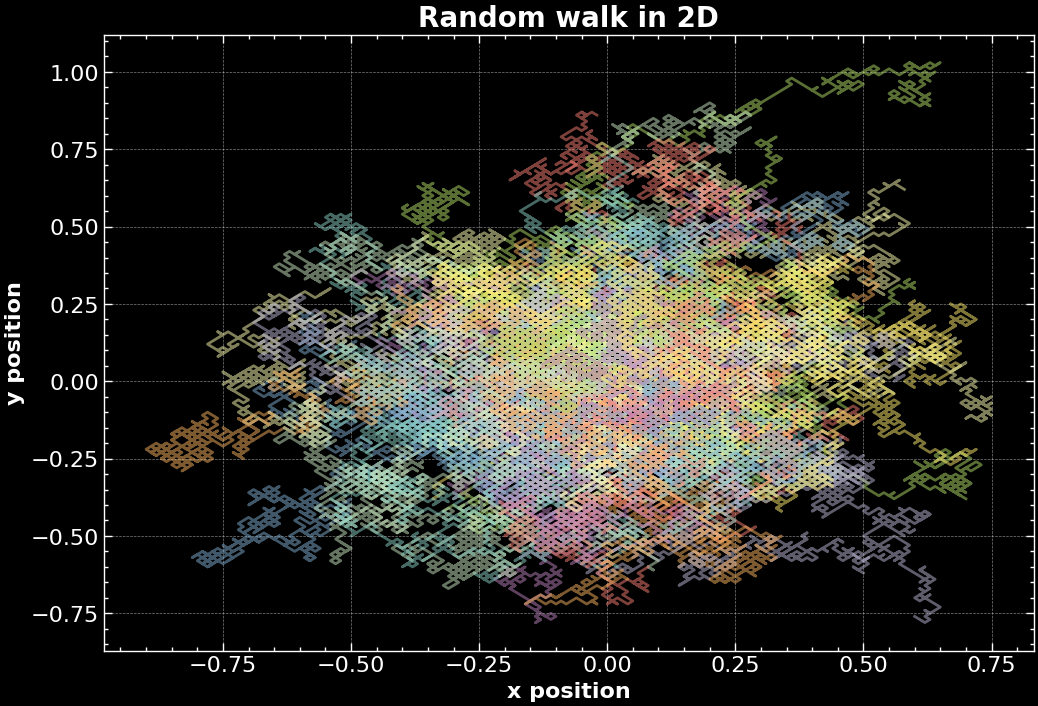

In [3]:
# Constants
N_WALKERS = 120
N_STEPS = 1000
X_STRIDE = .01
Y_STRIDE = .01

# Get the random walk
x_pos, y_pos = get_random_walk_2D(N_WALKERS, N_STEPS, X_STRIDE, Y_STRIDE)

# Plot the random walk
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x_pos.T, y_pos.T, alpha=.5, linewidth=2)
ax.set_xlabel("x position", fontsize=16, fontweight="bold")
ax.set_ylabel("y position", fontsize=16, fontweight="bold")
ax.set_title("Random walk in 2D", fontsize=20, fontweight="bold")

## Plotting displacement of a random walk in 2D as a function of the number of steps

In [4]:
def get_displacement(x_pos:np.ndarray, y_pos:np.ndarray) -> np.ndarray:
    """Get the displacement of the walkers
    Args:
        x_pos (np.ndarray): x positions of the walkers
        y_pos (np.ndarray): y positions of the walkers
    Returns:
        displacement (np.ndarray): displacement of the walkers
    NOTE: Need to transpose the arrays to plot them"""

    # Get the displacement
    displacement = np.sqrt(x_pos**2 + y_pos**2)

    return displacement

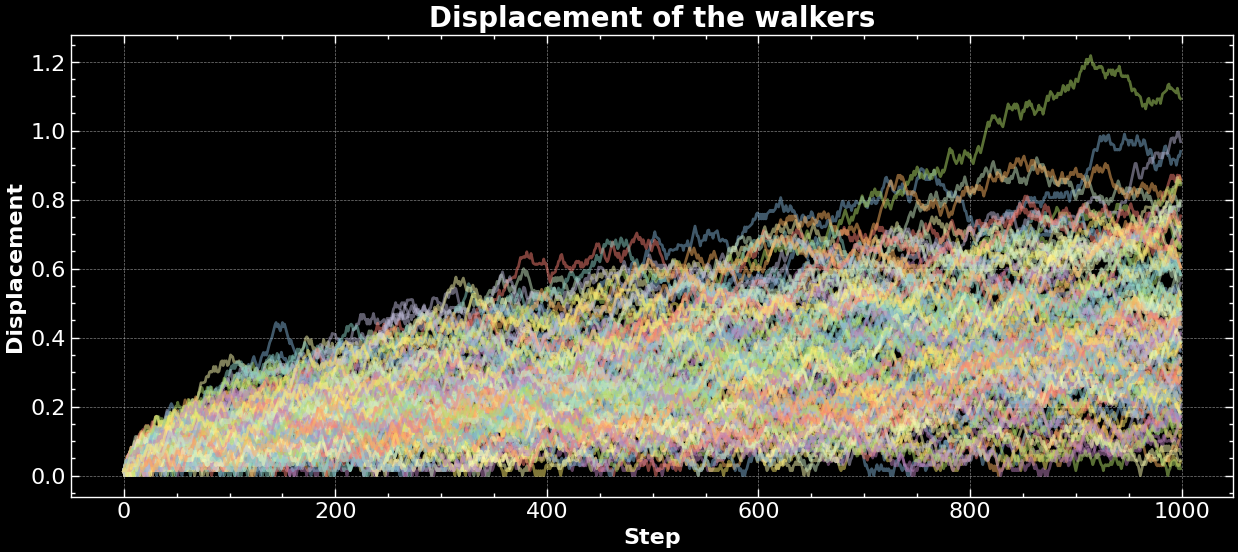

In [5]:
plt.figure(figsize=(15, 6))
plt.plot(get_displacement(x_pos, y_pos).T, alpha=.5, linewidth=2)
plt.xlabel("Step", fontsize=16, fontweight="bold")
plt.ylabel("Displacement", fontsize=16, fontweight="bold")
plt.title("Displacement of the walkers", fontsize=20, fontweight="bold");

- We wish to see how many of the walkers make it back to the origin
- Mathematics says that this event is `almost a certainty` for a large number of steps and a large number of walkers
- We will see if this is true for a large number of steps and a large number of walkers

In [6]:
def Has_reached_origin(x_pos:np.ndarray, y_pos:np.ndarray, tolerance:float) -> dict:
    """Check if the walkers have reached the origin
    Args:
        x_pos (np.ndarray): x positions of the walkers
        y_pos (np.ndarray): y positions of the walkers
        tolerance (float): tolerance for the origin
    Returns:
        has_reached_origin (list[bool]): list of booleans indicating if 
        the walkers have reached the origin"""
    displacement = get_displacement(x_pos, y_pos)
    bools = np.any(displacement < tolerance, axis=1)
    unique, counts = np.unique(bools, return_counts=True)
    return dict(zip(unique, counts))

In [7]:
TOLERANCE = .1
reached_origin_or_not = Has_reached_origin(x_pos, y_pos, .1)
reached_origin_or_not

{True: 120}

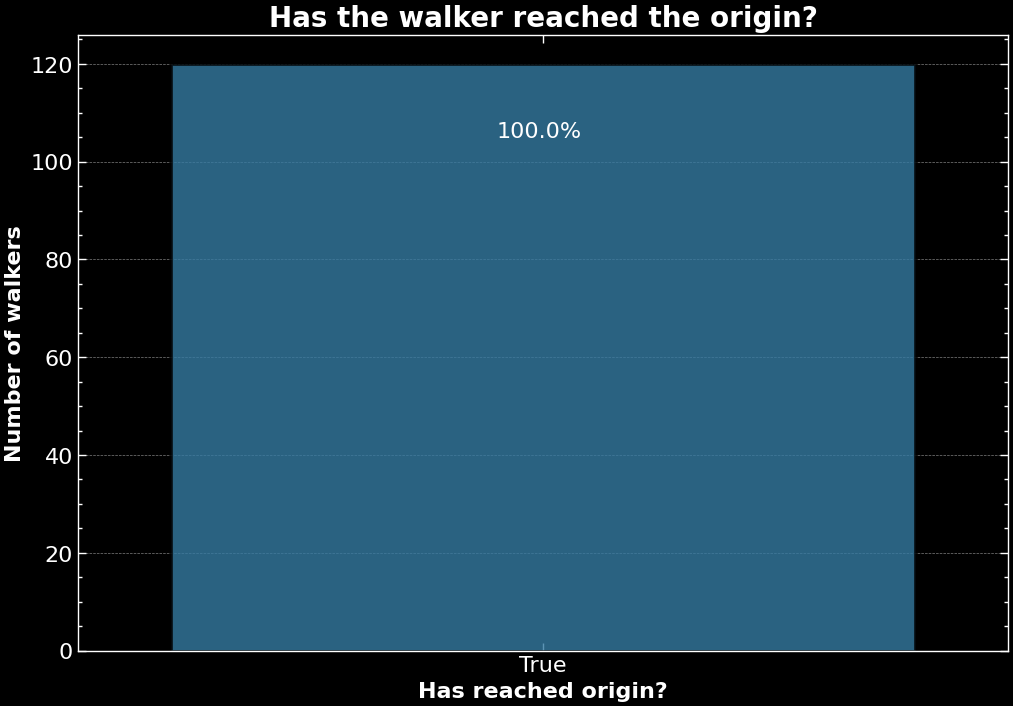

In [8]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=list(reached_origin_or_not.keys()), y=list(reached_origin_or_not.values()), 
            palette="mako", alpha=.8, linewidth=2, edgecolor="k", saturation=1)

for p in ax.patches:
        ax.annotate(f"{p.get_height() / N_WALKERS * 100}%", (p.get_x()+.35, p.get_height()-15), 
                    fontsize=16)

plt.xlabel("Has reached origin?", fontsize=16, fontweight="bold")
plt.ylabel("Number of walkers", fontsize=16, fontweight="bold")
plt.title("Has the walker reached the origin?", fontsize=20, fontweight="bold");

## Animation

In [9]:
displacement = get_displacement(x_pos, y_pos)

MovieWriter imagemagick unavailable; using Pillow instead.


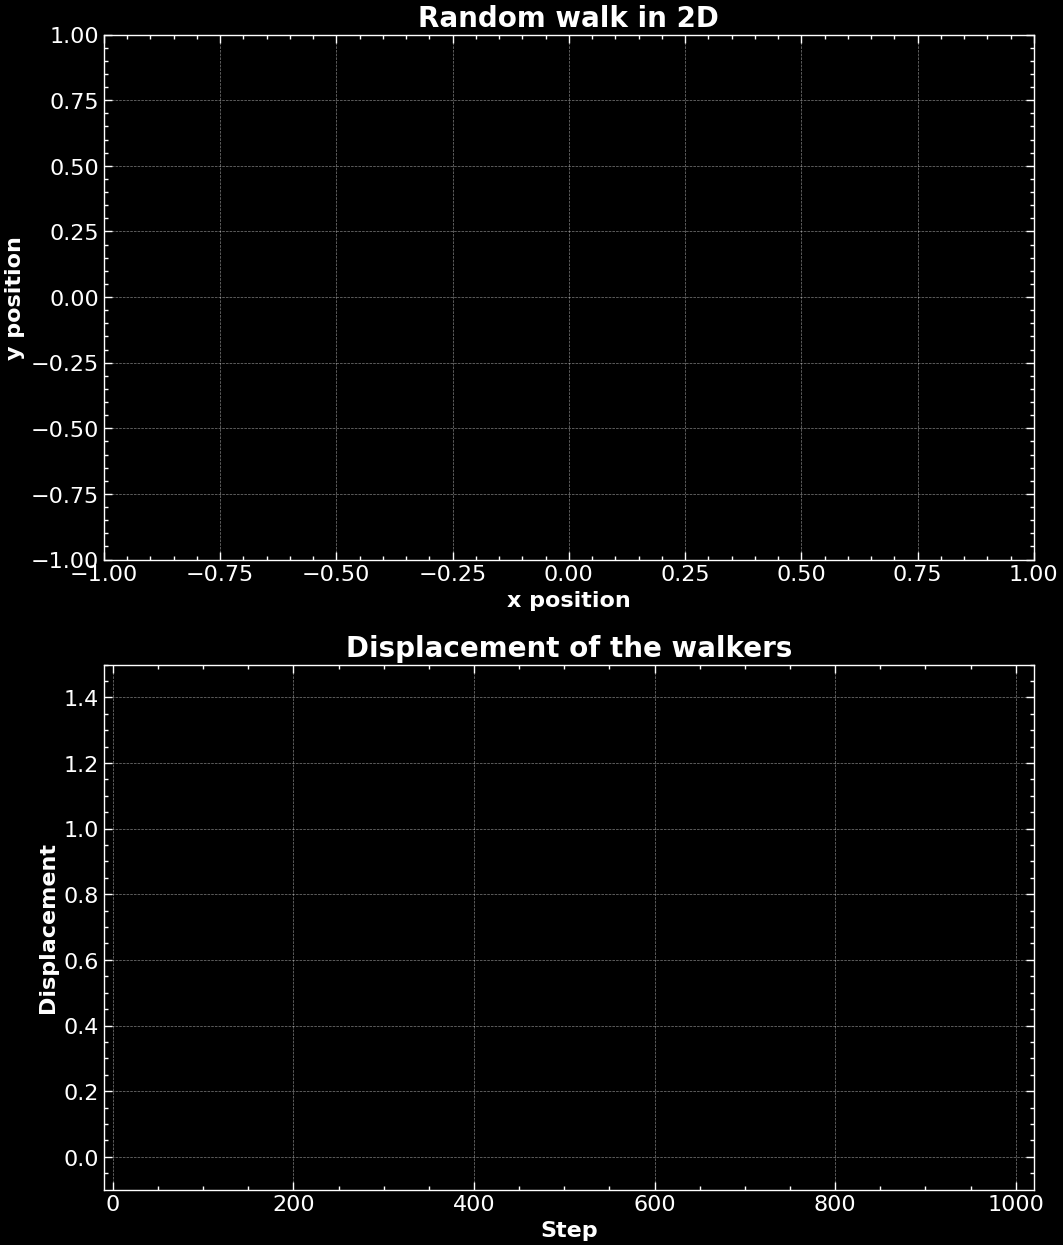

In [100]:
fig, ax = plt.subplots(2, 1, figsize=(12, 15))
ax1, ax2 = ax.ravel()
lines_ax1 = [ax1.plot([], [], "-", alpha=1, linewidth=2)[0] 
         for _ in range(N_WALKERS)]
lines_ax2 = [ax2.plot([], [], "-", alpha=1, linewidth=2)[0] 
            for _ in range(N_WALKERS)]

ax1.set_xlabel("x position", fontsize=16, fontweight="bold")
ax1.set_ylabel("y position", fontsize=16, fontweight="bold")
ax1.set_title("Random walk in 2D", fontsize=20, fontweight="bold")

ax2.set_xlabel("Step", fontsize=16, fontweight="bold")
ax2.set_ylabel("Displacement", fontsize=16, fontweight="bold")
ax2.set_title("Displacement of the walkers", fontsize=20, fontweight="bold")

ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)

ax2.set_xlim(-10, 1020)
ax2.set_ylim(-0.1, 1.5)

def animate(frame):
    for walker in range(N_WALKERS):
        x = x_pos.T[:, walker]
        y = y_pos.T[:, walker]
        displ = displacement.T[:, walker]
        lines_ax1[walker].set_data(x[:frame], y[:frame])
        lines_ax2[walker].set_data(np.arange(frame), displ[:frame])
    return lines_ax1, lines_ax2

anim = FuncAnimation(fig, animate, frames=1000, interval=10)
anim.save("random_walk2D.gif", writer="imagemagick", fps=20)